In [8]:
import pandas as pd

file_path = r'C:\Users\USER\Desktop\Sales_Data.xlsx'
df = pd.read_excel(file_path)
print(df)

    ProductID ProductName     Category  CustomerID  SaleAmount DateOfSale
0           1   Product C    Groceries        1031         NaN 2024-01-01
1           2   Product D     Clothing        1038        20.0 2024-01-02
2           3   Product A     Clothing        1048        10.0 2024-01-03
3           4   Product C    Furniture        1031        50.0 2024-01-04
4           5   Product C     Clothing        1003        10.0 2024-01-05
..        ...         ...          ...         ...         ...        ...
95         96   Product B     Clothing        1015        50.0 2024-04-05
96         97   Product B     Clothing        1028        50.0 2024-04-06
97         98   Product D    Furniture        1002        10.0 2024-04-07
98         99   Product B  Electronics        1019        10.0 2024-04-08
99        100   Product A    Groceries        1035       100.0 2024-04-09

[100 rows x 6 columns]


In [12]:
import numpy as np

In [9]:
print(df.columns)

Index(['ProductID', 'ProductName', 'Category', 'CustomerID', 'SaleAmount',
       'DateOfSale'],
      dtype='object')


In [14]:
SaleAmount = df['SaleAmount']
nan_count = np.isnan(SaleAmount).sum()
print("Number of NaN values:", nan_count)

Number of NaN values: 9


In [35]:
median_value = df['SaleAmount'].median()
print('Median Value of SaleAmount:' ,median_value)

Median Value of SaleAmount: 50.0


In [34]:
std_value = df['SaleAmount'].std()
print('Standard Deviation of SaleAmount:', std_value)

Standard Deviation of SaleAmount: 62.66019762417263


In [33]:
min_value = df['SaleAmount'].min()
print('Minimum Value of SaleAmount:', min_value)

Minimum Value of SaleAmount: 10.0


In [32]:
max_value = df['SaleAmount'].max()
print('Maximum value of SalesAmount:', max_value)

Maximum value of SalesAmount: 200.0


In [36]:
mean_value = np.mean(SaleAmount)
print("Mean value of SaleAmount:", mean_value)

Mean value of SaleAmount: 58.79120879120879


In [37]:
SaleAmount_new = np.where(np.isnan(SaleAmount), mean_value, SaleAmount)
print ("SaleAmount array after replacement:", SaleAmount_new)

SaleAmount array after replacement: [ 58.79120879  20.          10.          50.          10.
  50.          10.         200.          10.          10.
  10.         200.         100.          10.          50.
 100.          20.          20.          10.          58.79120879
 100.         200.          50.          10.          10.
  50.         100.         100.          50.          50.
  58.79120879  10.         100.          50.          58.79120879
  10.          50.          58.79120879  10.          20.
  50.          50.          10.          50.          10.
  10.          50.          50.         100.          50.
  20.          58.79120879  10.          10.          10.
 200.          10.         100.          50.          50.
  20.          20.          20.          10.          50.
  10.          58.79120879  50.          10.         200.
 200.         200.          10.          58.79120879 200.
  20.         200.         200.         100.          10.
  10.         100.  

In [10]:
#Analyzing Sales by Category
Category_sales =df.groupby('Category')['SaleAmount'].sum().reset_index()
print(Category_sales)

      Category  SaleAmount
0     Clothing      1070.0
1  Electronics      1380.0
2    Furniture      1380.0
3    Groceries      1520.0


In [12]:
product_sales = df.groupby('Category')['SaleAmount'].sum().reset_index()
print(product_sales)

      Category  SaleAmount
0     Clothing      1070.0
1  Electronics      1380.0
2    Furniture      1380.0
3    Groceries      1520.0


In [13]:
product_sales.sort_values('SaleAmount',ascending=False)

,Category,SaleAmount
3,Groceries,1520.0
1,Electronics,1380.0
2,Furniture,1380.0
0,Clothing,1070.0


In [50]:
average_sales = df['SaleAmount'].mean()
print(average_sales)

58.79120879120879


In [14]:
product_sales

,Category,SaleAmount
0,Clothing,1070.0
1,Electronics,1380.0
2,Furniture,1380.0
3,Groceries,1520.0


In [2]:
import matplotlib.pyplot as plt

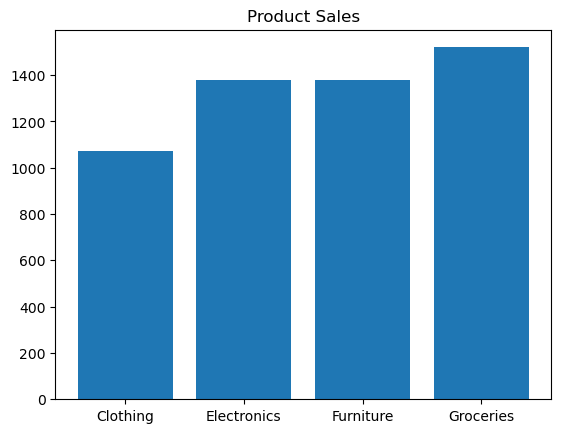

In [29]:
plt.bar(x = product_sales['Category'],height = product_sales['SaleAmount'])
plt.title ('Product Sales')
plt.show()

In [16]:
product_distribution = df['Category'].value_counts()
product_distribution

Category
Groceries      30
Electronics    26
Furniture      24
Clothing       20
Name: count, dtype: int64

Text(0.5, 1.0, 'Sales By Category')

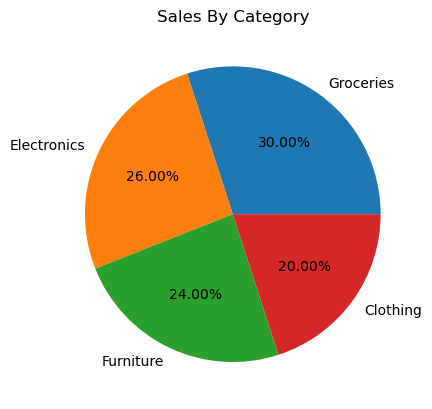

In [17]:
plt.pie(product_distribution, labels = product_distribution.index, autopct = '%.2f%%',textprops = {'color' : 'black'})
plt.title('Sales By Category', fontdict = {'color' : 'black'})

In [83]:
Date_Of_Sale = df['DateOfSale']
Date_Of_Sale

0    2024-01-01
1    2024-01-02
2    2024-01-03
3    2024-01-04
4    2024-01-05
        ...    
95   2024-04-05
96   2024-04-06
97   2024-04-07
98   2024-04-08
99   2024-04-09
Name: DateOfSale, Length: 100, dtype: datetime64[ns]

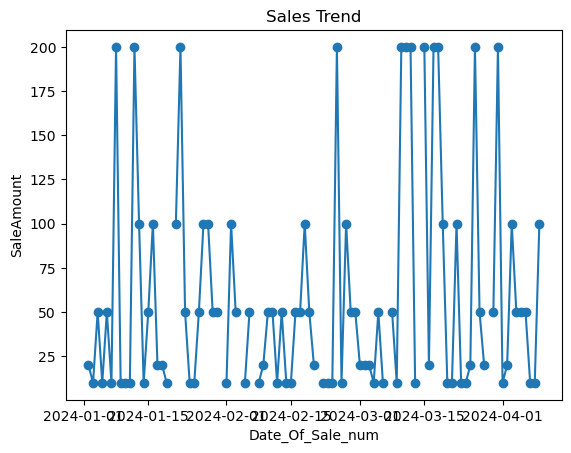

In [110]:
Date_Of_Sale_num = pd.to_numeric (Date_Of_Sale.apply(lambda x:x.timestamp()))
plt.plot(Date_Of_Sale,SaleAmount,marker='o')
plt.title('Sales Trend')
plt.xlabel('Date_Of_Sale_num')
plt.ylabel('SaleAmount')
plt.axline((Date_Of_Sale_num.iloc[0],SaleAmount.iloc[0]),slope = (SaleAmount.iloc[-1]-SaleAmount.iloc[0])/(len(Date_Of_Sale_num)-1), color = 'red', linewidth = 500)
plt.show()